**PROBLEM STATEMENT** Prepare svm model for classifying the area under fire for forest fires data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split# to split the data into train and test
from sklearn.svm import SVR# feature selection
from sklearn.preprocessing import normalize# to normalize the data

In [ ]:
#Data loading
Forest = pd.read_csv("D:/7 data mining/supervised/black box/assignment/forestfires.csv")
Forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**DATA UNDERSTANDING**

The dataset contains the data related to the factors which results in fire in the forest.

month: Month in the year

day: Days of the week

FFMC: Fine Fuel moisture code(a numerical rating of the moisture content of litter and cured fine fuels and is derived from temperature, relative humidity, wind and rain.

DMC: Duff moisture code(a numeric rating of average moisture content of loosely compacted organic layers of moderate depth.)

DC: Drought code(respresents the drying deep into the soil

ISI: Initial spread index(a numeric rating of the expected rate of fire spread. It is based on wind speed)

temp: Temperature of the particular area

RH: Relative humidity

wind: The speed of the wind

rain: The quanity of rain

Area: The area affected by the fire


In [ ]:
Forest = Forest.iloc[:,2:]
Forest.info()
Forest.isnull().sum()
Forest = Forest.replace(" ","_",regex = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

**The dataset doesnot contain any null values.**

**There are Days and Months column whose dummy variables columns are present in the dataset.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206BC280310>,
      dtype=object)

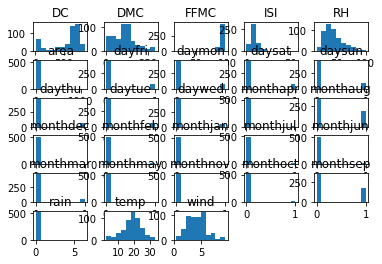

In [ ]:
# Histogram
Forest.hist(grid = False)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text major ticklabel objects>)

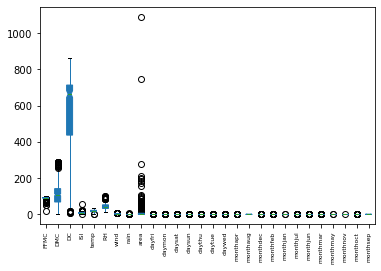

In [ ]:
# Boxplot
Forest.boxplot(notch = True, patch_artist = True, grid = False);plt.xticks(fontsize=6, rotation = 90)
# we can see the presence of the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


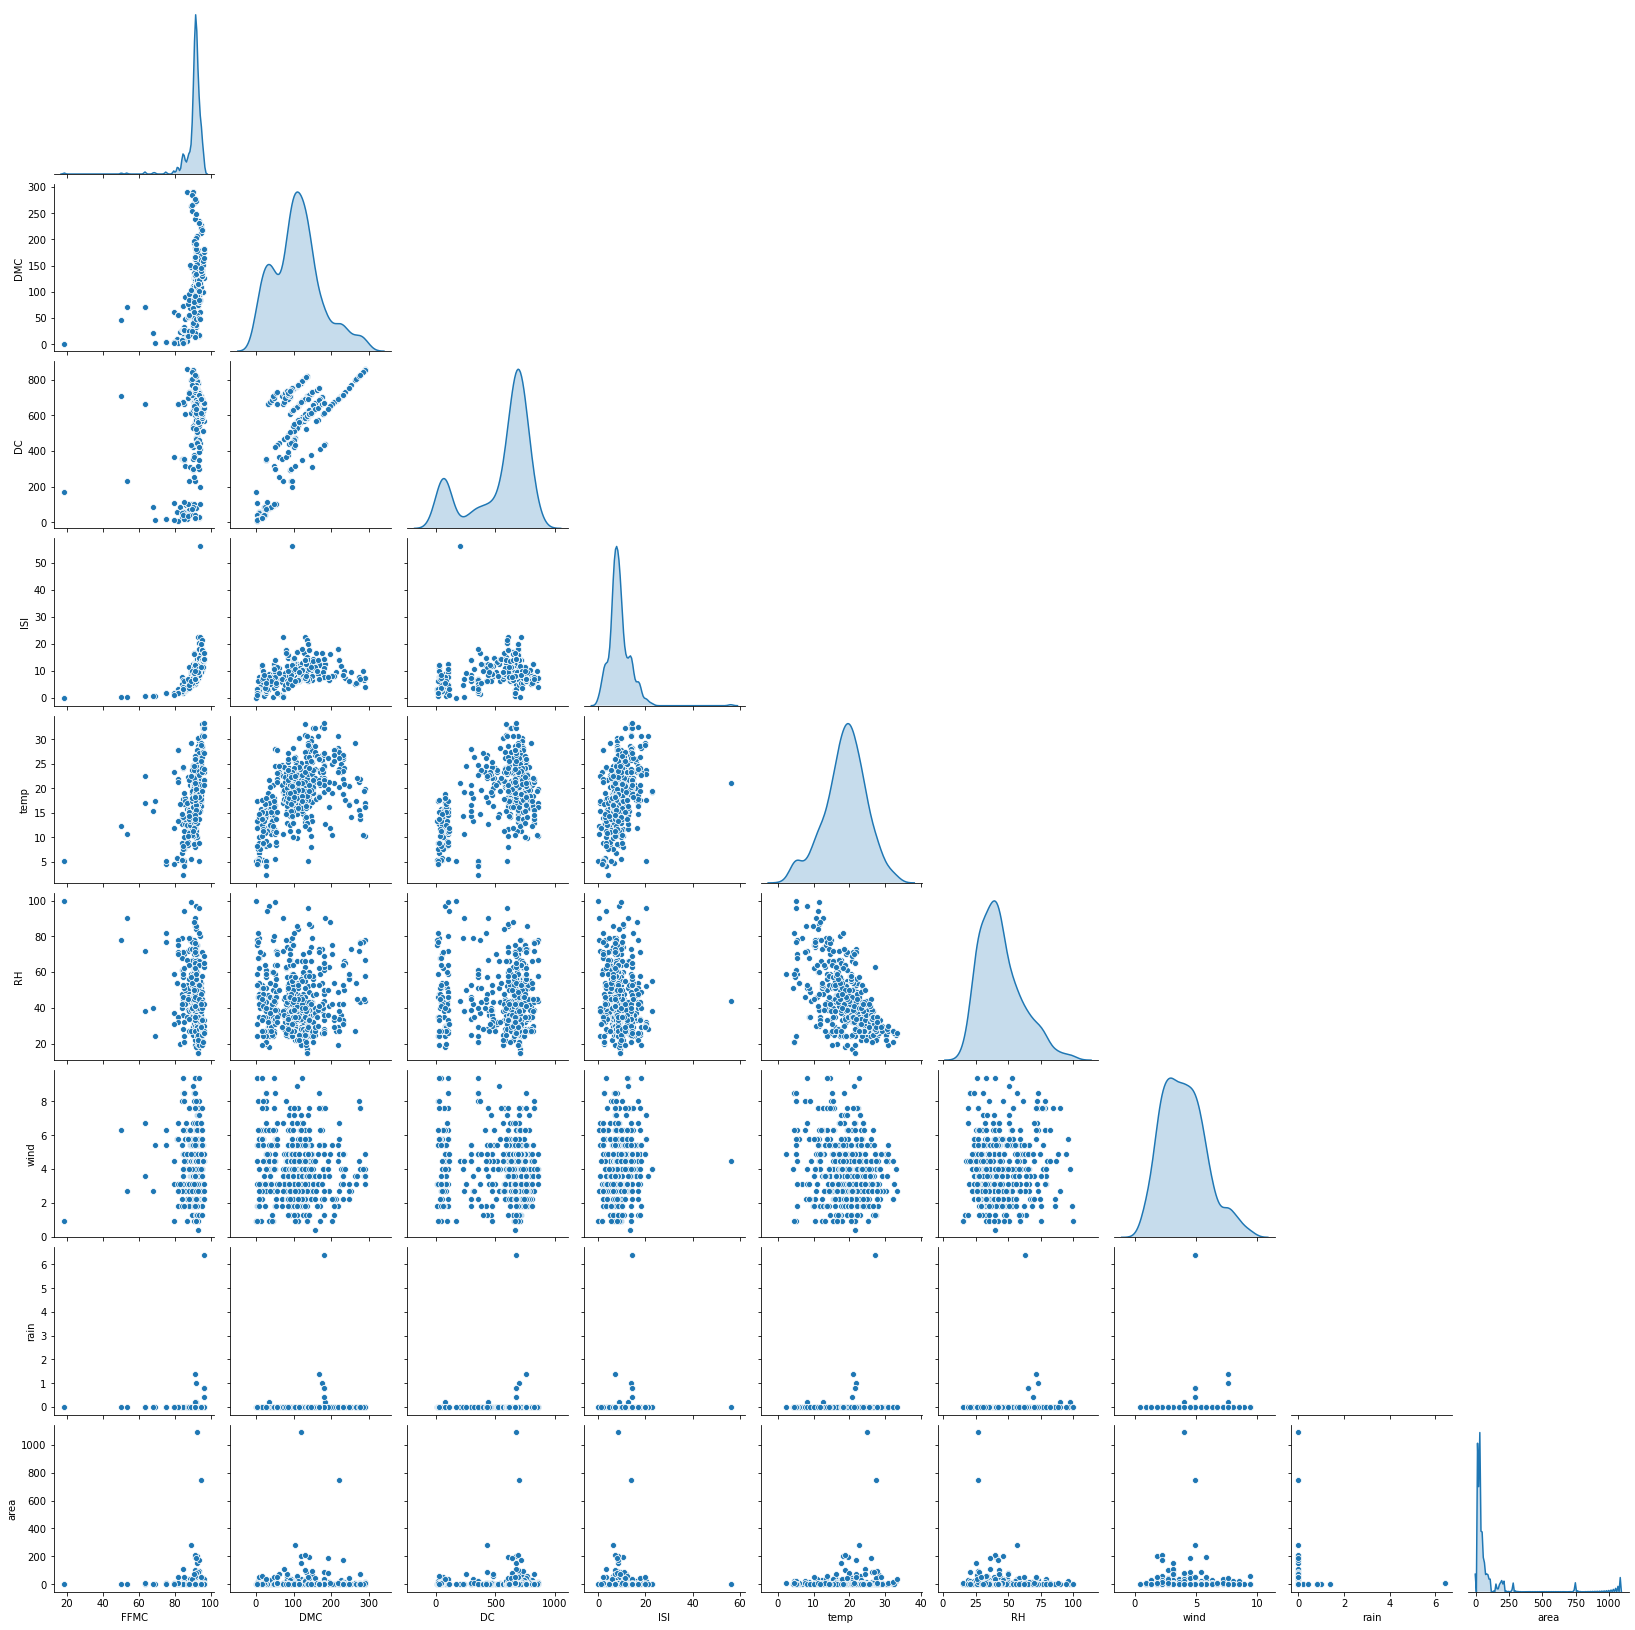

In [ ]:
# Pairplot
sns.pairplot(Forest.iloc[:,0:9], corner = True, diag_kind = "kde")
# There is no corelation between the variables.

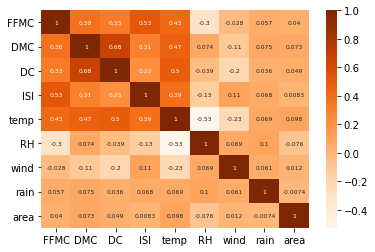

In [ ]:
# Heat map and Correlation CoiForesticient
sns.heatmap(Forest.iloc[:,0:9].corr(), annot = True, annot_kws={"size": 6}, cmap = 'Oranges')

WE CAN OBSERVE FROM ABOVE HEATMAP THERE IS NO CORRELATION IN BETWEEN OUTPUT AND INPUT FEATURES.
SO WE CAN'T ABLE TO GET PROPER RESULT WITH HELP OF THIS INPUT FEATURE ONLY.

**DATA PRE PROCESSING:**

We dropped the day and month column.

We normalized the data.

We plotted the data in histogram, boxplot, pairplot and heatmap.

In [ ]:
# Nomalization of data (as data contain binary value)
Forest.iloc[:,0:8] = normalize(Forest.iloc[:,0:8])

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

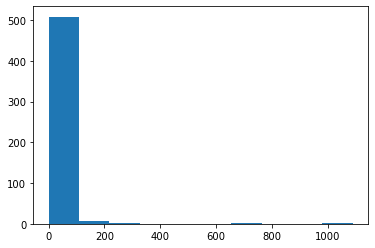

In [ ]:
##################################### - Splitting data - ############################################

# Splitting in X and y
X = Forest.drop(['area', "size_category"],axis=1)
y = Forest['area']
plt.hist(y)
Forest.area.value_counts()

In [ ]:
# Splitting in Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

**Kernel trick**

The above explanation of SVM covered examples where blue and green classes are linearly separable. However, what if we wanted to apply SVMs to non-linear problems? How would we do that?
This is where the kernel trick comes in. A kernel is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.

**RBF Kernel** is popular because of its similarity to K-Nearest Neighborhood Algorithm. It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset

In [ ]:
######################################### - Fitting Model- ##########################################

# Fitting SVM Model
model = SVR(kernel = 'rbf', gamma = 1, epsilon = 0.01)
model.fit(X_train,y_train)

SVR(epsilon=0.01, gamma=1)

In [ ]:
# Accuracy of Model on Train and Test data
model.score(X_train,y_train)
model.score(X_test,y_test)

-0.023617923172784883

In [ ]:
# Predication Train data and Test data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
# RMSE Train data and Test data
rmse_train = np.sqrt(np.mean((pred_train-y_train)**2))
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))

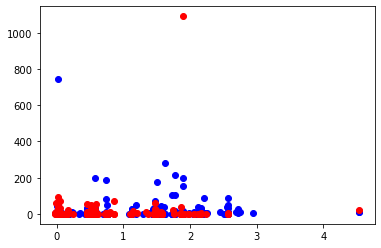

In [ ]:
# Visualising Train data and Test data
plt.plot(pred_train,y_train,"bo")
plt.plot(pred_test,y_test,"ro")

**Solution:**

The prediction on the train and test data plotted in the sctterplot shows that the area predicted is comparatively less than the area in the historical forest fire .